<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/01_Neural_Network_Regression_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Network in Tensorflow

Simplyfing Regression Problem : Predicting a numerical variable based on some combination of variables

In [60]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [61]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()


## Creating data to view and fit

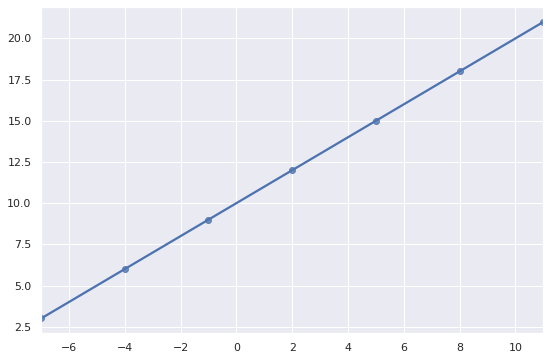

In [62]:
# Create Features
X = np.array(np.arange(-7 , 14 , 3))

# Create labels
y = np.array(np.arange(3,24,3))

#Plotting It
plt.figure(figsize = (9,6))
sns.regplot(x = X, y = y);

## Input and output shape

In [63]:
# Create a demo tensor housing price prediction problem

house_info = tf.constant(['bedroom' , 'bathroom' , 'garage'])
house_price = tf.constant([123456])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123456], dtype=int32)>)

In [64]:
# Recall that the individual element inside array is a scaler , therefore it is of 0 dim
X[0].shape , y[0].shape , X[0].ndim

((), (), 0)

In [65]:
# Converting Numpy array into tensor
X = tf.constant(X)
y = tf.constant(y)

X[0].shape , y[0].shape , X[0].ndim

(TensorShape([]), TensorShape([]), 0)

## Modelling In Tensorflow

1. Create a model - define input and output layer , as well as the hidden layers of a deep learning model
2. Compiling a model 
  - define the loss function (the function that tell our model how wrong it is
  - define the optimizer (tell our model how to improve our model)
  - evaluation metrics (performance of model)
3. Fitting a model

In [66]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.mae)

# Fit the model
model.fit(X , y , epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 267ms/step - loss: 10.8599 - mean_absolute_error: 10.8599
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 10.8099 - mean_absolute_error: 10.8099
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 10.7599 - mean_absolute_error: 10.7599
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 10.7099 - mean_absolute_error: 10.7099
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.6599 - mean_absolute_error: 10.6599


In [67]:
# Prediction using model - Here we will expect by predicting with X = 17 , expected y value is 27. 
# Given that the MAE is around 10 to 10 , our predicted value of 11.4 + 10 still fall out from our expected value
y_pred = model.predict([17])
y_pred

array([[11.441017]], dtype=float32)

## Tuning the model

We can tune our model to give better results by examining each of the steps taken in creating , compiling and fitting.

**1. Creating a model** - Add more layers , increase number of hidden units , change the activation function

**2. Compiling a model** - Change the optimization function , tune the learning rate of the optimization function

**3. Fitting a model** - More epochs (train longer) , give more data

## Typical workflow expectation
- Build a model --> fit it --> evaluate it --> hyperparameter tuning --> fit it --> hyper tuning --> evaluate it --> ....

- **To put it as an analogy , it is like a dial to tune the model**

In [68]:
# Tuning the model (changing the Epoch)

#1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.mae)

#3. Fir the model
model.fit(X , y , epochs = 100 , verbose = True)

Epoch 1/100
1/1 [==============================] - 0s 304ms/step - loss: 10.6983 - mean_absolute_error: 10.6983
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6483 - mean_absolute_error: 10.6483
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5983 - mean_absolute_error: 10.5983
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5483 - mean_absolute_error: 10.5483
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.4983 - mean_absolute_error: 10.4983
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4483 - mean_absolute_error: 10.4483
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3983 - mean_absolute_error: 10.3983
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3483 - mean_absolute_error: 10.3483
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2983 - mean_absolute_error: 10.2983
Epoch

In [69]:
# Making prediction from model again - Tuned model improved closer to expected value of 27 when X = 17
model.predict([17])

array([[32.099113]], dtype=float32)

In [70]:
# Tuning the model (Adding an extra hidden layer with 100 hidden units)

#1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50 , activation = None),
  tf.keras.layers.Dense(1)
])

#2. Compile a model
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              loss = tf.keras.losses.mae,
              metrics = tf.keras.metrics.mae)

#3. Fit a model
model.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [71]:
# Visualising the data - Attempt with larger dataset

In [72]:
X = tf.range(-100 , 100 , 4)
y = X + 10 

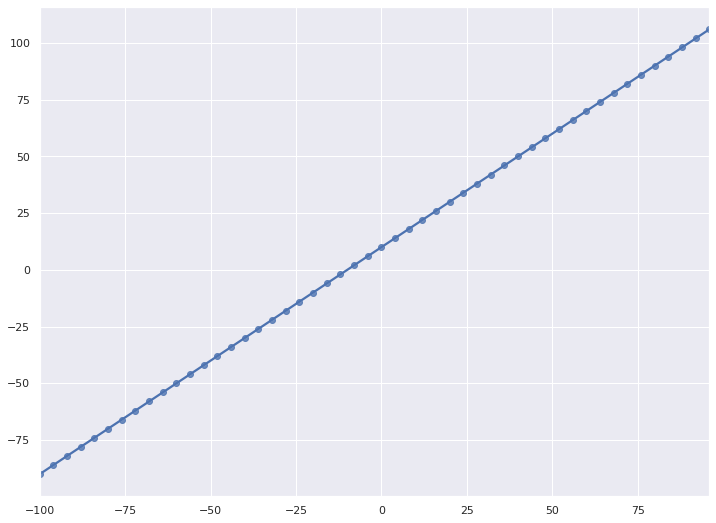

In [73]:
plt.figure(figsize = (12,9))
sns.regplot(x = X , 
            y = y);

In [74]:
# Splitting Dataset by train test split
tf.random.set_seed(42)

X_train , X_test , y_train , y_test = train_test_split(X.numpy() , y.numpy() , test_size = 0.2)
X_train , X_test = tf.constant(X_train) , tf.constant(X_test)
y_train , y_test = tf.constant(y_train) , tf.constant(y_test)

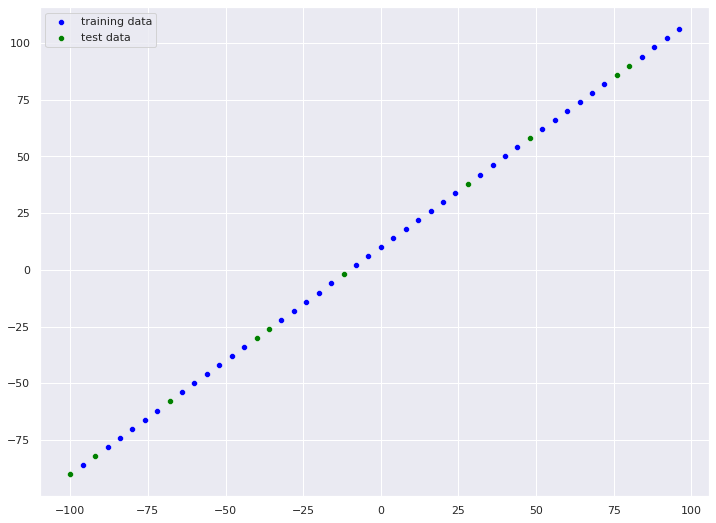

In [75]:
plt.figure(figsize = (12,9))

sns.scatterplot(x = X_train , 
                y = y_train,
                color = 'blue',
                label = 'training data')

sns.scatterplot(x = X_test , 
                y = y_test,
                color = 'green',
                label = 'test data')

plt.legend();

In [125]:
# Creating a new model for new dataset and try building 

tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(5 , input_shape = [1] , name = 'input_layer'),
  tf.keras.layers.Dense(1, name = 'output_layer')
] , name = 'Simple_Linear_Regression') 

#2. Compile a model
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = tf.keras.metrics.mae)

#2a. Model Sumamry
model.summary()

Model: "Simple_Linear_Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 5)                 10        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters
* Trainable parameters - these are the parameters the model can update as it trains
* Non-trainable params - these params are not updated during training (**transfer learning**)

In [126]:
#3. Fit a model
model.fit(X_train , y_train , epochs = 100 , verbose = False)

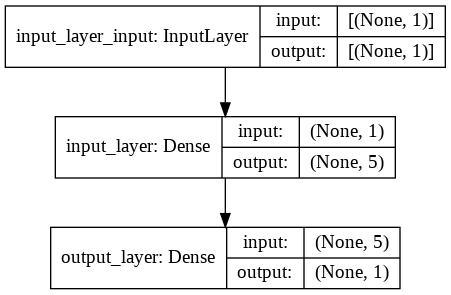

In [127]:
from tensorflow.keras.utils import plot_model
plot_model(model = model , show_shapes=True)

### Visualising our model's prediction

In [128]:
# Predicting on test data

y_pred = model.predict(X_test)
y_pred = tf.squeeze(y_pred)
y_pred.ndim

1

In [129]:
def prediction_plot(train_data = X_train, test_data = X_test, train_labels = y_train, test_labels = y_test, predictions = y_pred):

    plt.figure(figsize = (12,9))

    sns.scatterplot(x = train_data  , y = train_labels , color = 'blue' , label = 'training data')

    sns.scatterplot(x = test_data , y = test_labels , color = 'green' , label = 'test_data')

    sns.scatterplot(x = test_data , y = predictions , color = 'red' , label = 'predictions')

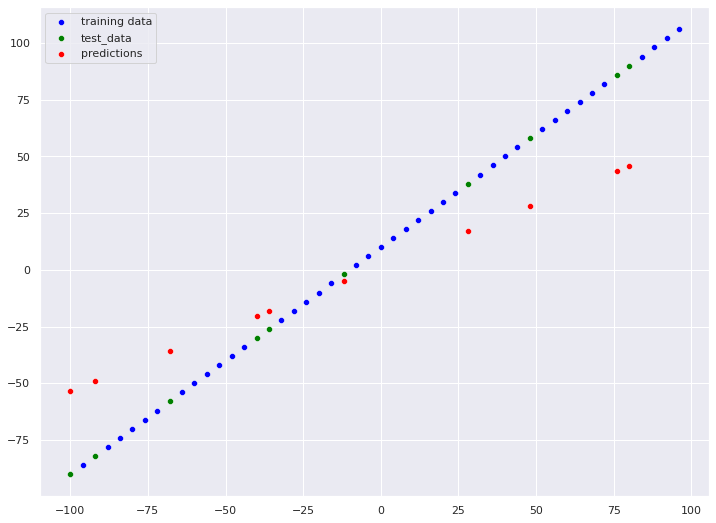

In [130]:
prediction_plot(X_train , X_test , y_train , y_test , y_pred)